In [22]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Dense, Add
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


Adding the ResNet Architecture

In [17]:
def basic_residual_block(x, filters, strides=1):
    shortcut = x

    # Change the number of filters in the shortcut connection to match the number of filters in the main path
    if strides != 1 or x.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Conv2D(filters, kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([shortcut, x])
    x = ReLU()(x)

    return x


In [18]:
def resnet(num_classes, num_blocks=[2, 2, 2, 2]):
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    for stage in range(len(num_blocks)):
        filters = 64 * (2 ** stage)
        x = basic_residual_block(x, filters, strides=1)
        for _ in range(1, num_blocks[stage]):
            x = basic_residual_block(x, filters)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


In [19]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Training the model

In [20]:
model = resnet(10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 74s 37ms/step - loss: 1.3941 - accuracy: 0.4984 - val_loss: 1.7420 - val_accuracy: 0.4419
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9876 - accuracy: 0.6529 - val_loss: 1.0575 - val_accuracy: 0.6365
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8089 - accuracy: 0.7170 - val_loss: 0.9431 - val_accuracy: 0.6738
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6928 - accuracy: 0.7609 - val_loss: 0.9131 - val_accuracy: 0.6961
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6080 - accuracy: 0.7890 - val_loss: 0.7278 - val_accuracy: 0.7520
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5316 - accuracy: 0.8141 - val_loss: 0.8165 - val_accuracy: 0.7328
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4665 - accuracy: 0.8389 - val_loss: 0.7397 -

313/313 [==============================] - 3s 9ms/step


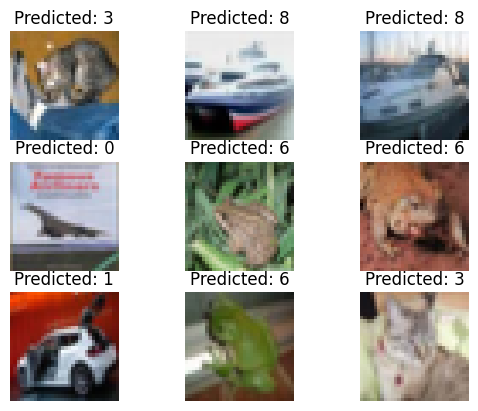

In [24]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize some correct predictions
correct_indices = np.where(predicted_classes == np.argmax(y_test, axis=1))[0][:9]
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[correct_indices[i]])
    plt.title("Predicted: " + str(predicted_classes[correct_indices[i]]))
    plt.axis('off')

plt.show()


Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2438 - accuracy: 0.9139 - val_loss: 0.6236 - val_accuracy: 0.8042
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.2038 - accuracy: 0.9279 - val_loss: 0.6673 - val_accuracy: 0.8052
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.1766 - accuracy: 0.9368 - val_loss: 1.0939 - val_accuracy: 0.7362
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.1489 - accuracy: 0.9468 - val_loss: 0.8546 - val_accuracy: 0.7828
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.1268 - accuracy: 0.9544 - val_loss: 0.8839 - val_accuracy: 0.7812
Epoch 6/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.1131 - accuracy: 0.9597 - val_loss: 0.9920 - val_accuracy: 0.7735
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.0976 - accuracy: 0.9653 - val_loss: 1.1551 -

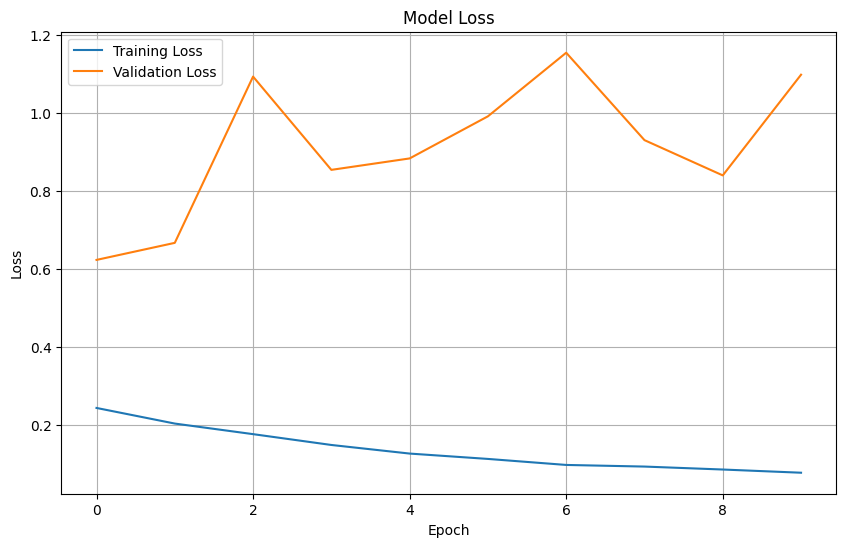

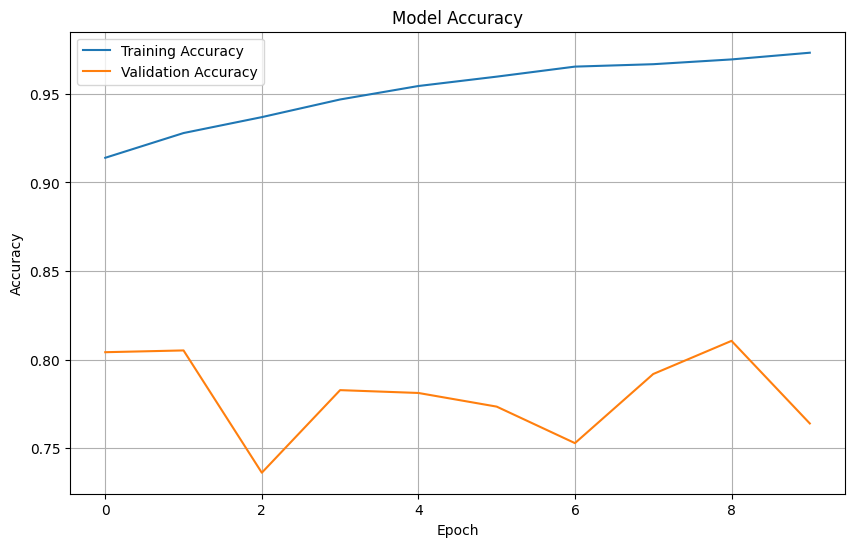

In [25]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


Visualization